<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
sns.set(style="whitegrid")
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))  # Set default figure size

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [10]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris=pd.read_csv(url, header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
iris.columns=["sepal_length", "sepal_width", "petal_length","petal_width", "species"]
iris.dropna(how="all", inplace=True)
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
iris.describe()
iris['species'].value_counts()
iris[['species']].value_counts()

species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Task 3: Visualize the Data
---

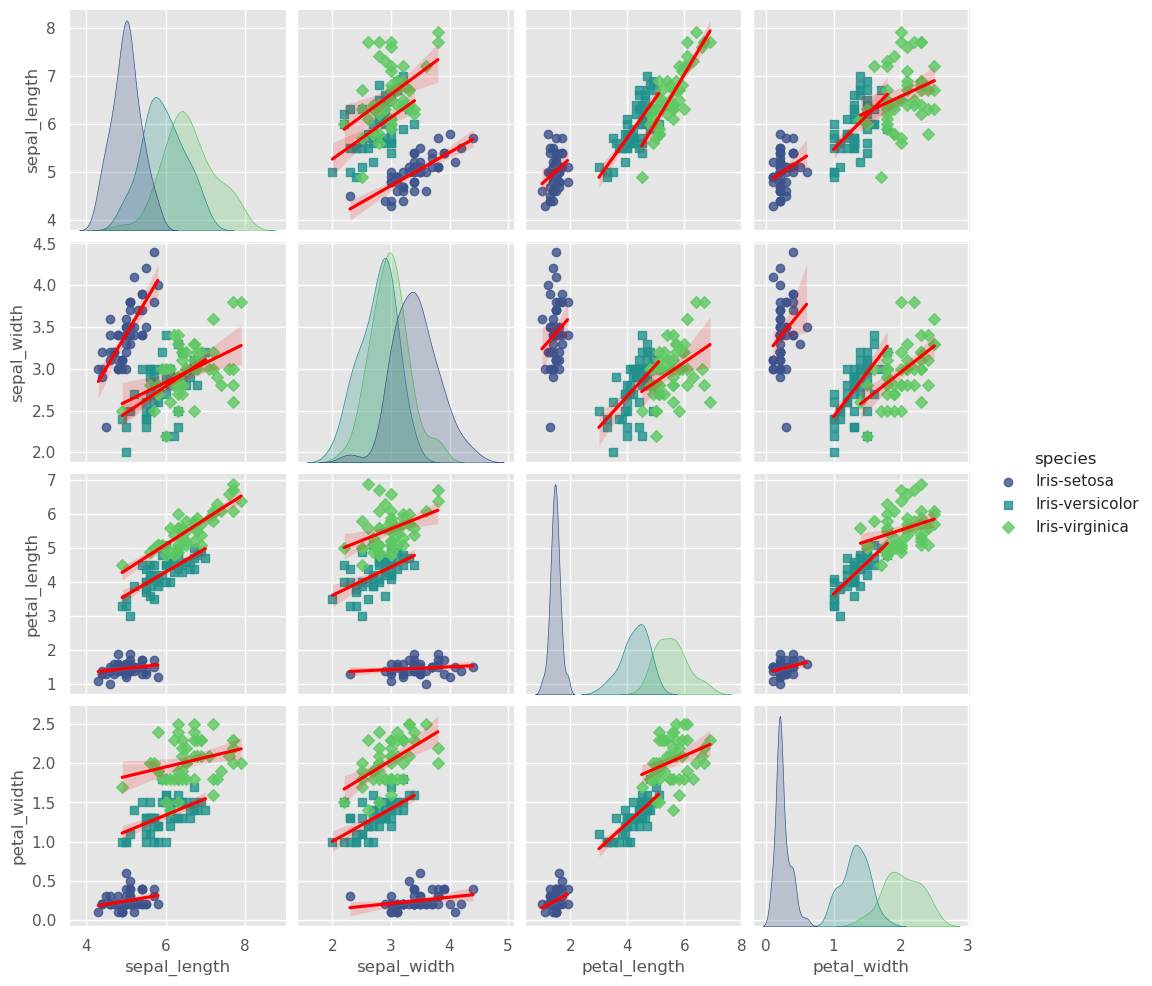

In [43]:
#sns.pairplot(iris)
# With hue (color by categorical variable)
sns.pairplot(iris, 
             hue='species',  # Color by a categorical column
             palette='viridis',
             markers=['o', 's', 'D'],  # Different markers for categories
             height=2.5, 
             kind='reg', plot_kws={'line_kws':{'color':'red'}})

# With regression lines
#sns.pairplot(iris, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [44]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(iris, figsize=(12, 12), diagonal='kde', alpha=0.5)
# plt.show()

### Task 4: Standardize the Data
---

In [82]:
from sklearn.preprocessing import StandardScaler
X = iris.iloc[:, 0:4].values
y = iris.species.values

X = StandardScaler().fit_transform(X)

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [110]:
covariance_matrix = np.cov(X.T)
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [49]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]


### Task 6: Singular Value Decomposition (SVD)
---

In [114]:
eigen_vec_svd, _, _= np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Task 7: Picking Principal Components Using the Explained Variance
---

In [51]:
for val in eigen_values:
    print(val)

2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [52]:
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

[72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]

In [53]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

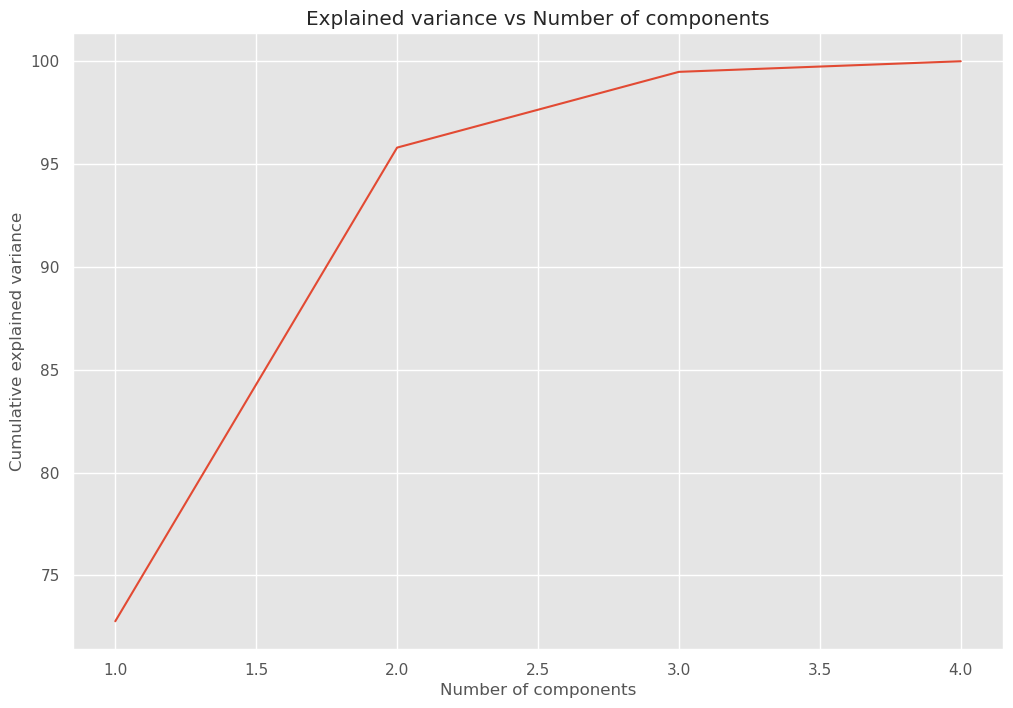

In [54]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [121]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [120]:
projection_matrix = (eigen_vectors.T[:])[:2].T

print("Projection matrix: \n", projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [122]:
X_pca = X.dot(projection_matrix)
X_pca[y==species, 1].size

50

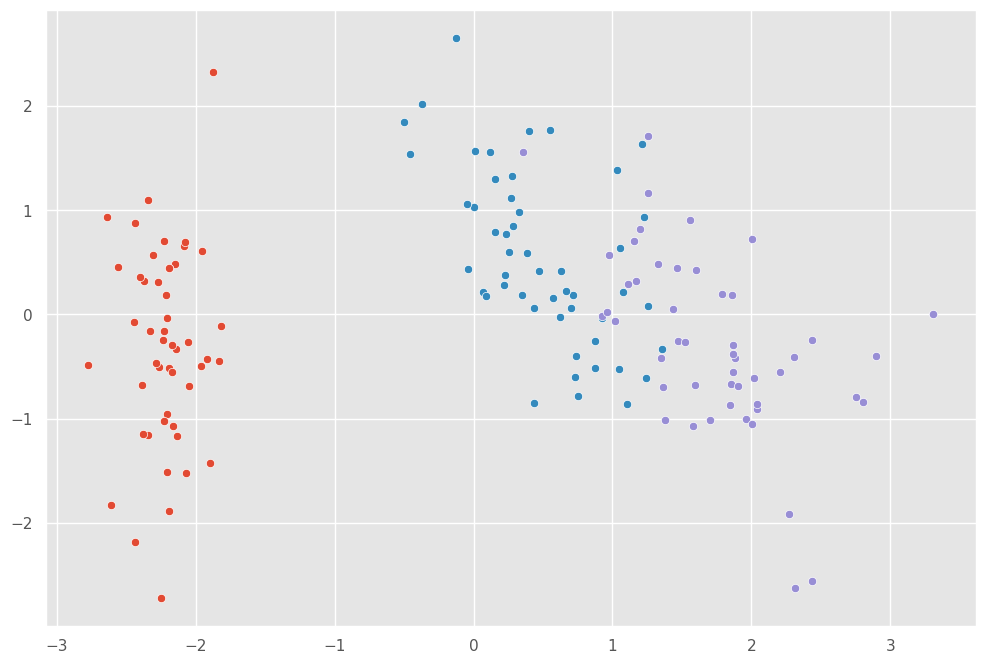

In [126]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(x=X_pca[y==species, 0], y=X_pca[y==species, 1])